# DECISION TREES

## Content
```
1. Usecase Intro
2. Why not Logistic regression or KNN?
3. Intro to Decision Trees
4. How does the Decision Tree algorithm work?
5. Entropy
6. Attribute Selection Measure<br>
    - Information gain                            
    - Gini Index
7. Decision Tree Implementation
```

## Usecase Intro


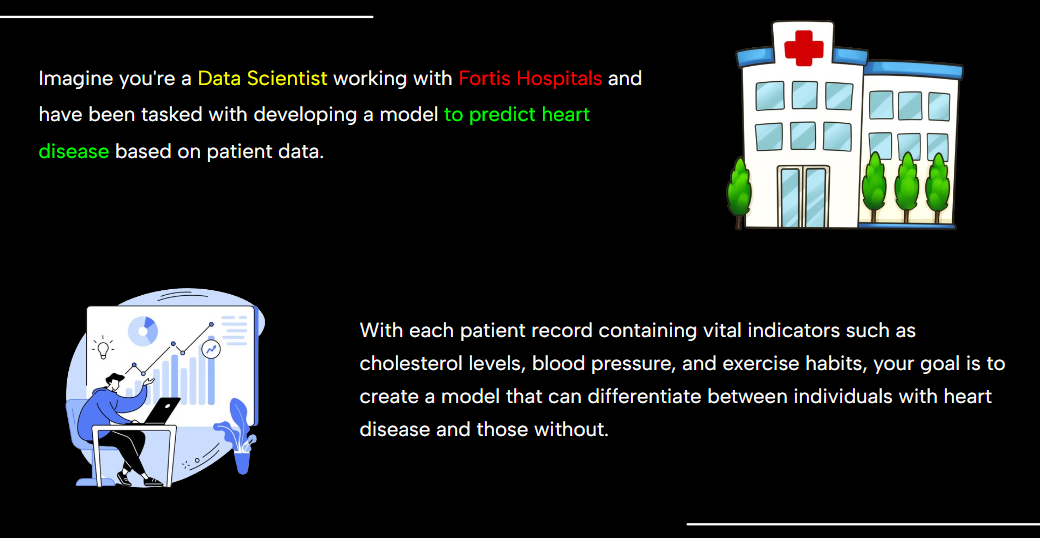

For this, we'll be using the [Heart Disease Dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset).

To do our job properly, we'll have to take a look at the features:



```
1.  Age
2.  Sex
3.  Chest Pain Type (cp) - 4 values
4.  Resting Blood Pressure (trtbps)
5.  Serum Cholesterol (chol) - measured in mg/dl
6.  Fasting Blood Sugar (fbs) - fasting blood sugar > 120 mg/dl
7.  Resting Electrocardiographic Results (restecg) - values 0, 1, 2
8.  Maximum Heart Rate Achieved (thalach)
9.  Exercise Induced Angina (exang)
10. ST Depression Induced by Exercise Relative to Rest (oldpeak)
11. The Slope of The Peak Exercise ST Segment (slp)
12. Number of Major Vessels Colored by Fluoroscopy (caa) - number of vessels can range from 0 to 3
13. Thallium Stress Test (thall) - thallium test results: 0 = normal; 1 = fixed defect; 2 = reversible defect
14. Output (Diagnosis of Heart Disease)
```

<br>

---
---



## Why not use Logistic Regression or KNN?

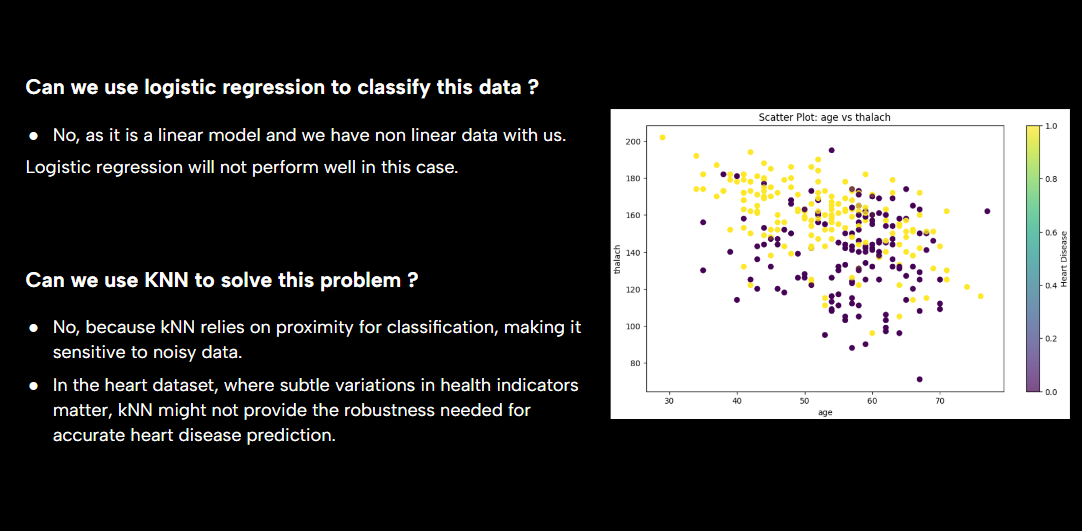

So, now we'll learn about another algorithm called **Decision Tree** which is perfect for this application.

<br>

---
---

## Intro to Decision Trees

Earlier, you must have studied a concept called an if-else statement. A decision tree functions in a similar way.

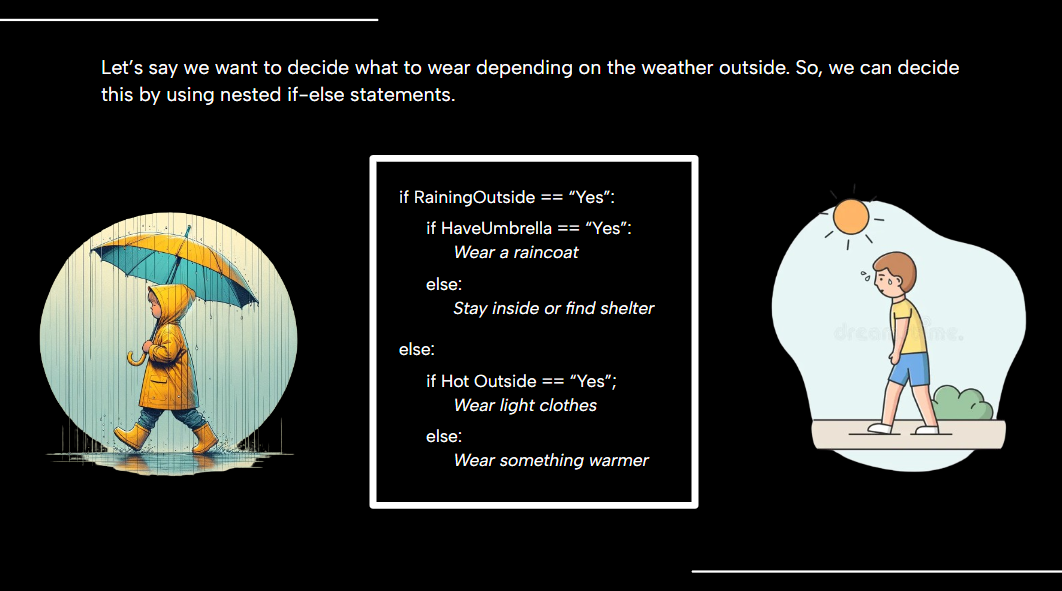

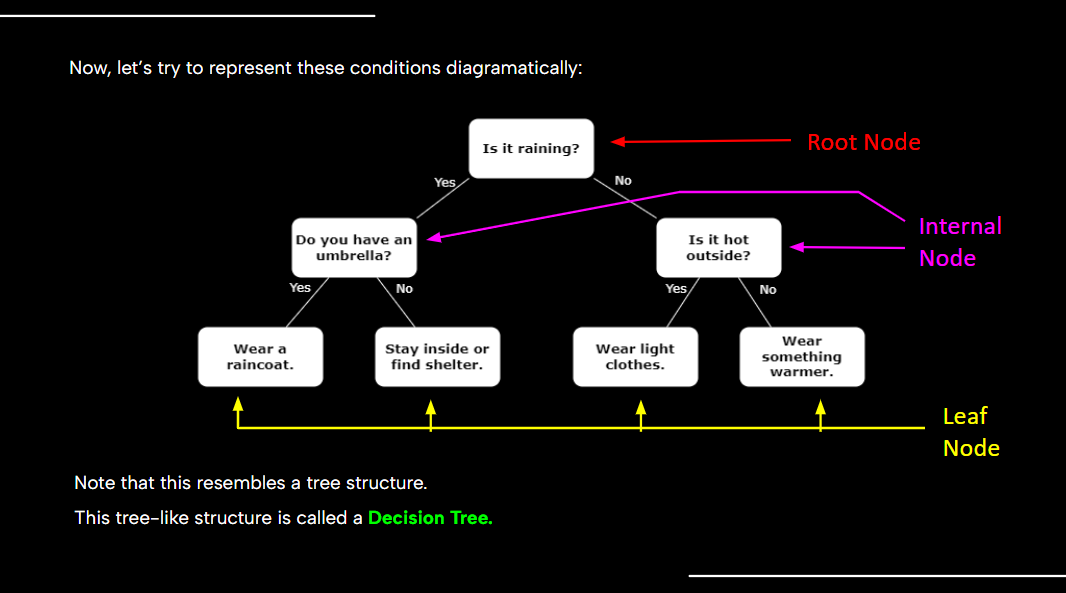

- Top most node is called root node
- Bottom most node is called leaf node
- The nodes in between them are called Internal node

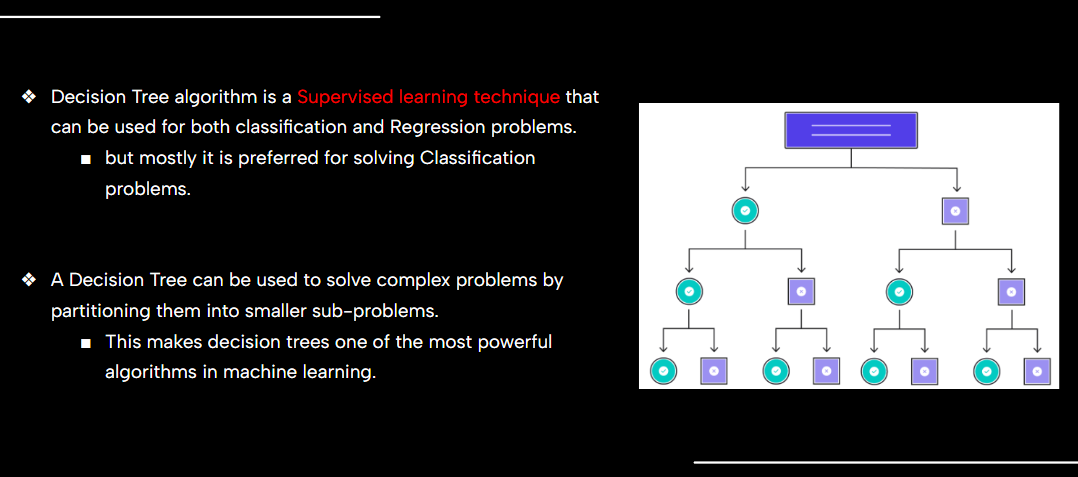

<br>

---
---

 ## How does the Decision Tree algorithm work?

With the help of another example, let's understand the workflow of decision trees.

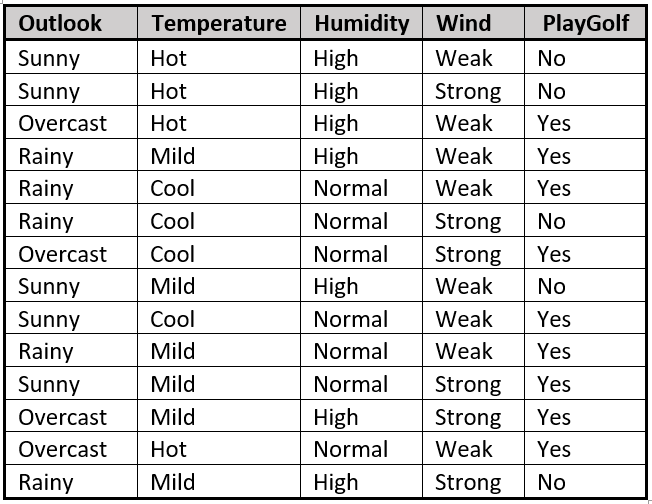

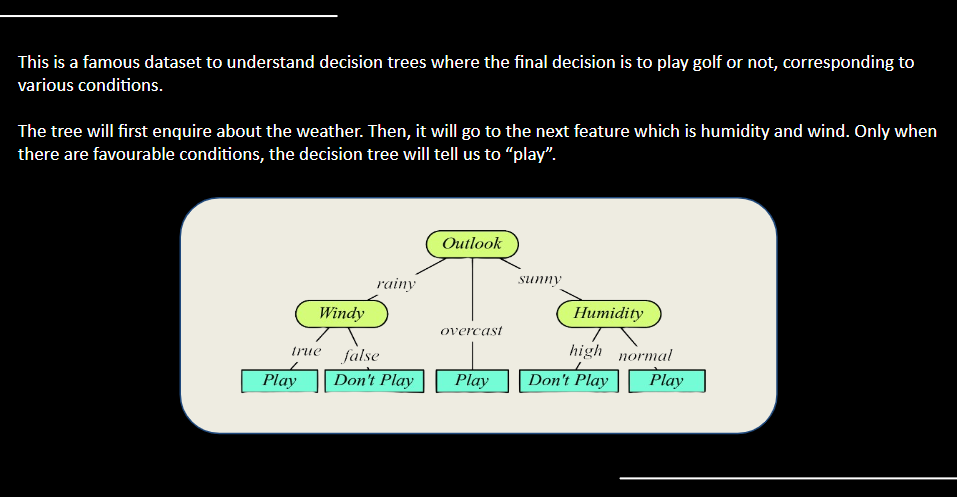

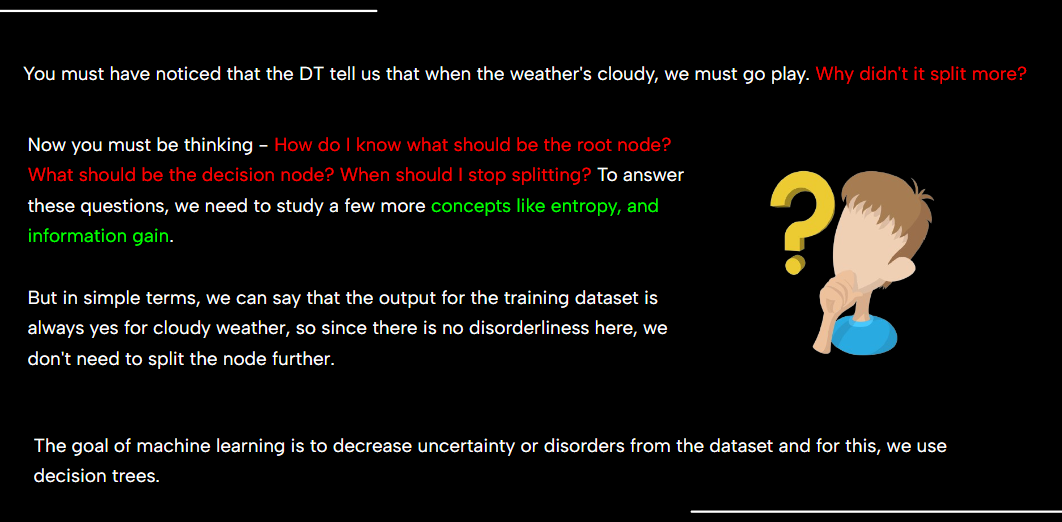

<br>

---
---

## Entropy

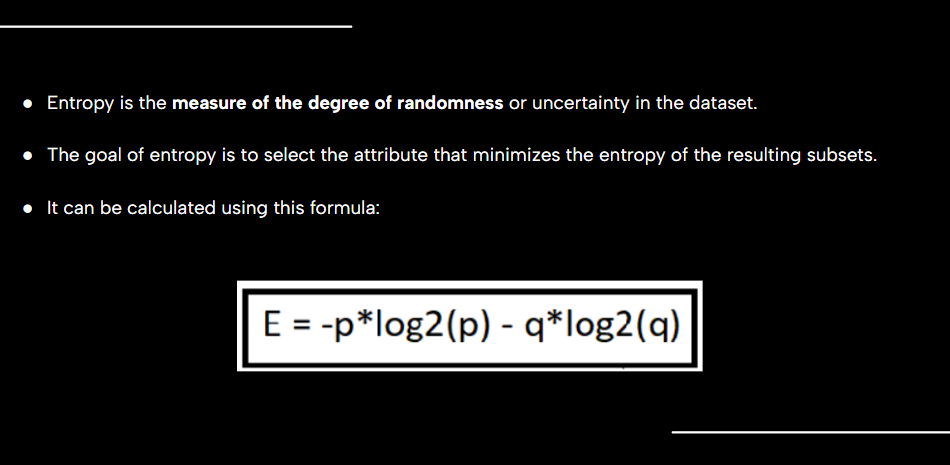


```
                                           Entropy(d)= -P(yes)log2 P(yes)- P(no) log2 P(no)
```


Where,

• D = Total number of samples

• P(yes)= probability of yes

• P(no)= probability of no

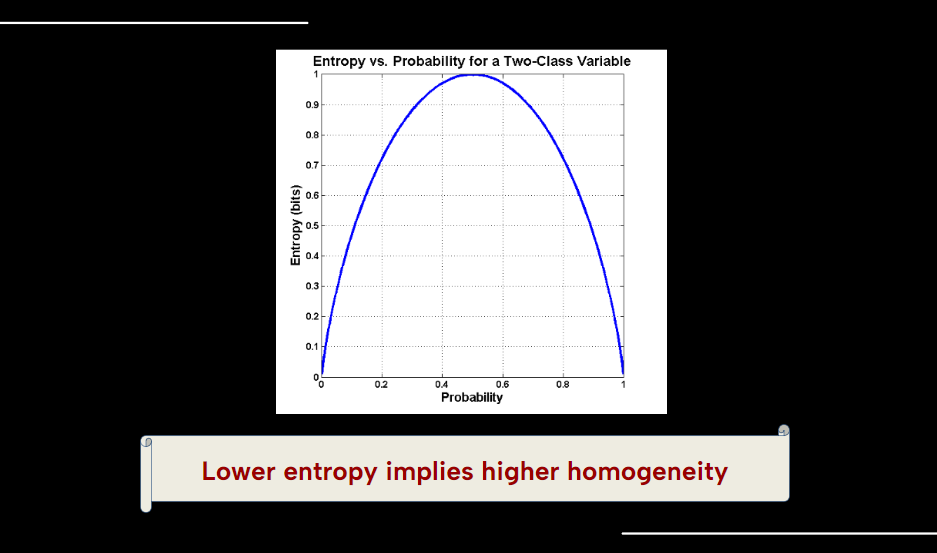

<br>

---
---

## Attribute Selection Measure (ASM)

Now, the questions arise:
- How does the decision tree know which feature to split on?
- How does the tree figure out which attribute/feature will give us the best results?
- When should the tree stop splitting?

All these questions can be answered by a concept called ASM (attribute Selection Measure).

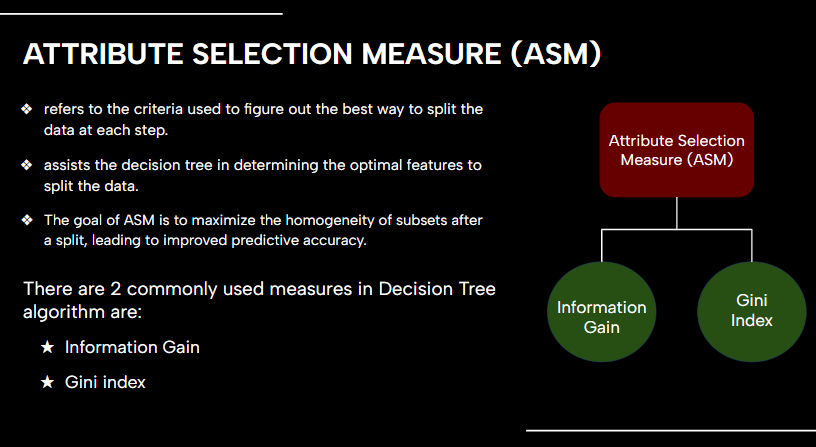

### Information Gain

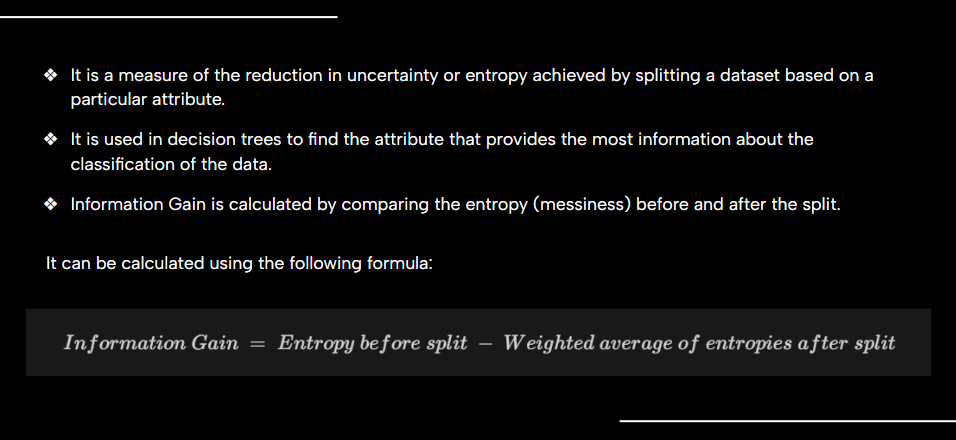

Now lets solve a decision tree problem with help of this formula to get a better understanding.

<br>

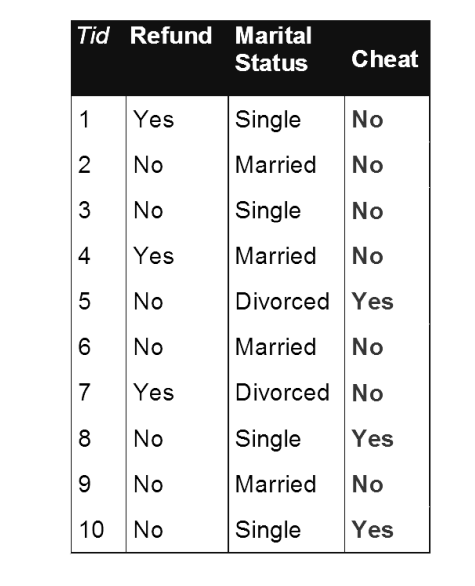



First, we will calculate the entropy of the whole dataset.

D[3+, 7-] {3 positive value and 7 negative value}
```
Entropy of D = [(-3/10) log_2 (3/10)] +  [(-7/10) log_2 (7/10)]
             = 0.881
```

Now we have to find the entropy and information gain of each attribute.

<br>


#### **Refund**

$S_{yes}$ = [0+, 3-]

Entropy ($S_{yes}$) =  ```[(-0/3) log_2 (0/3)] +  [(-3/3) log_2 (3/3)] = 0```

Sno = [3+,4-]

Entropy ($S_{no}$) =  ```[(-3/7) log_2 (3/7)] +  [(-4/7) log_2 (4/7)]= 0.986```

<br>

Now we will calculate the Information Gain.
```
InfoGain (D,Refund) = Entropy(D) - Weighted Average x Each Feature

= 0.881 - (3/10 x Entropy[S(yes)]) - (7/10 x Entropy[S(no)])

= 0.881-0.690

= 0.191
```

<br>


#### **Marital Status**

$S_{single}$ = [2+, 2-]

Entropy ($S_{single}$ ) =  ```[(-2/4) log_2 (2/4)] +  [(-2/4) log_2 (2/4)] = 1```

<br>

$S_{married}$  = [0+,4-]

Entropy ($S_{no}$ ) =  ```[(-0/4) log_2 (0/4)] +  [(-4/4) log_2 (4/4)] = 0```

<br>

$S_{divorced}$ = [1+,1-]

Entropy ($S_{divorced}$ ) =  ```[(-1/2) log_2 (1/2)] +  [(-1/2) log_2 (1/2)] = 1```

<br>

Now we will calculate the Information Gain.
```
InfoGain (D, Marital Status) = Entropy(D) - Weighted Average x Each Feature
= 0.881 - (4/10 x Entropy[S(single)]) - (4/10 x Entropy[S(married)]) - (2/10 x Entropy[S(divorced)])
= 0.881-0.6
= 0.281
```

As the information gain of the `Marital Status` column is more, we will choose it as the node and construct the tree.
--


So, the tree will look something like this:

<br>

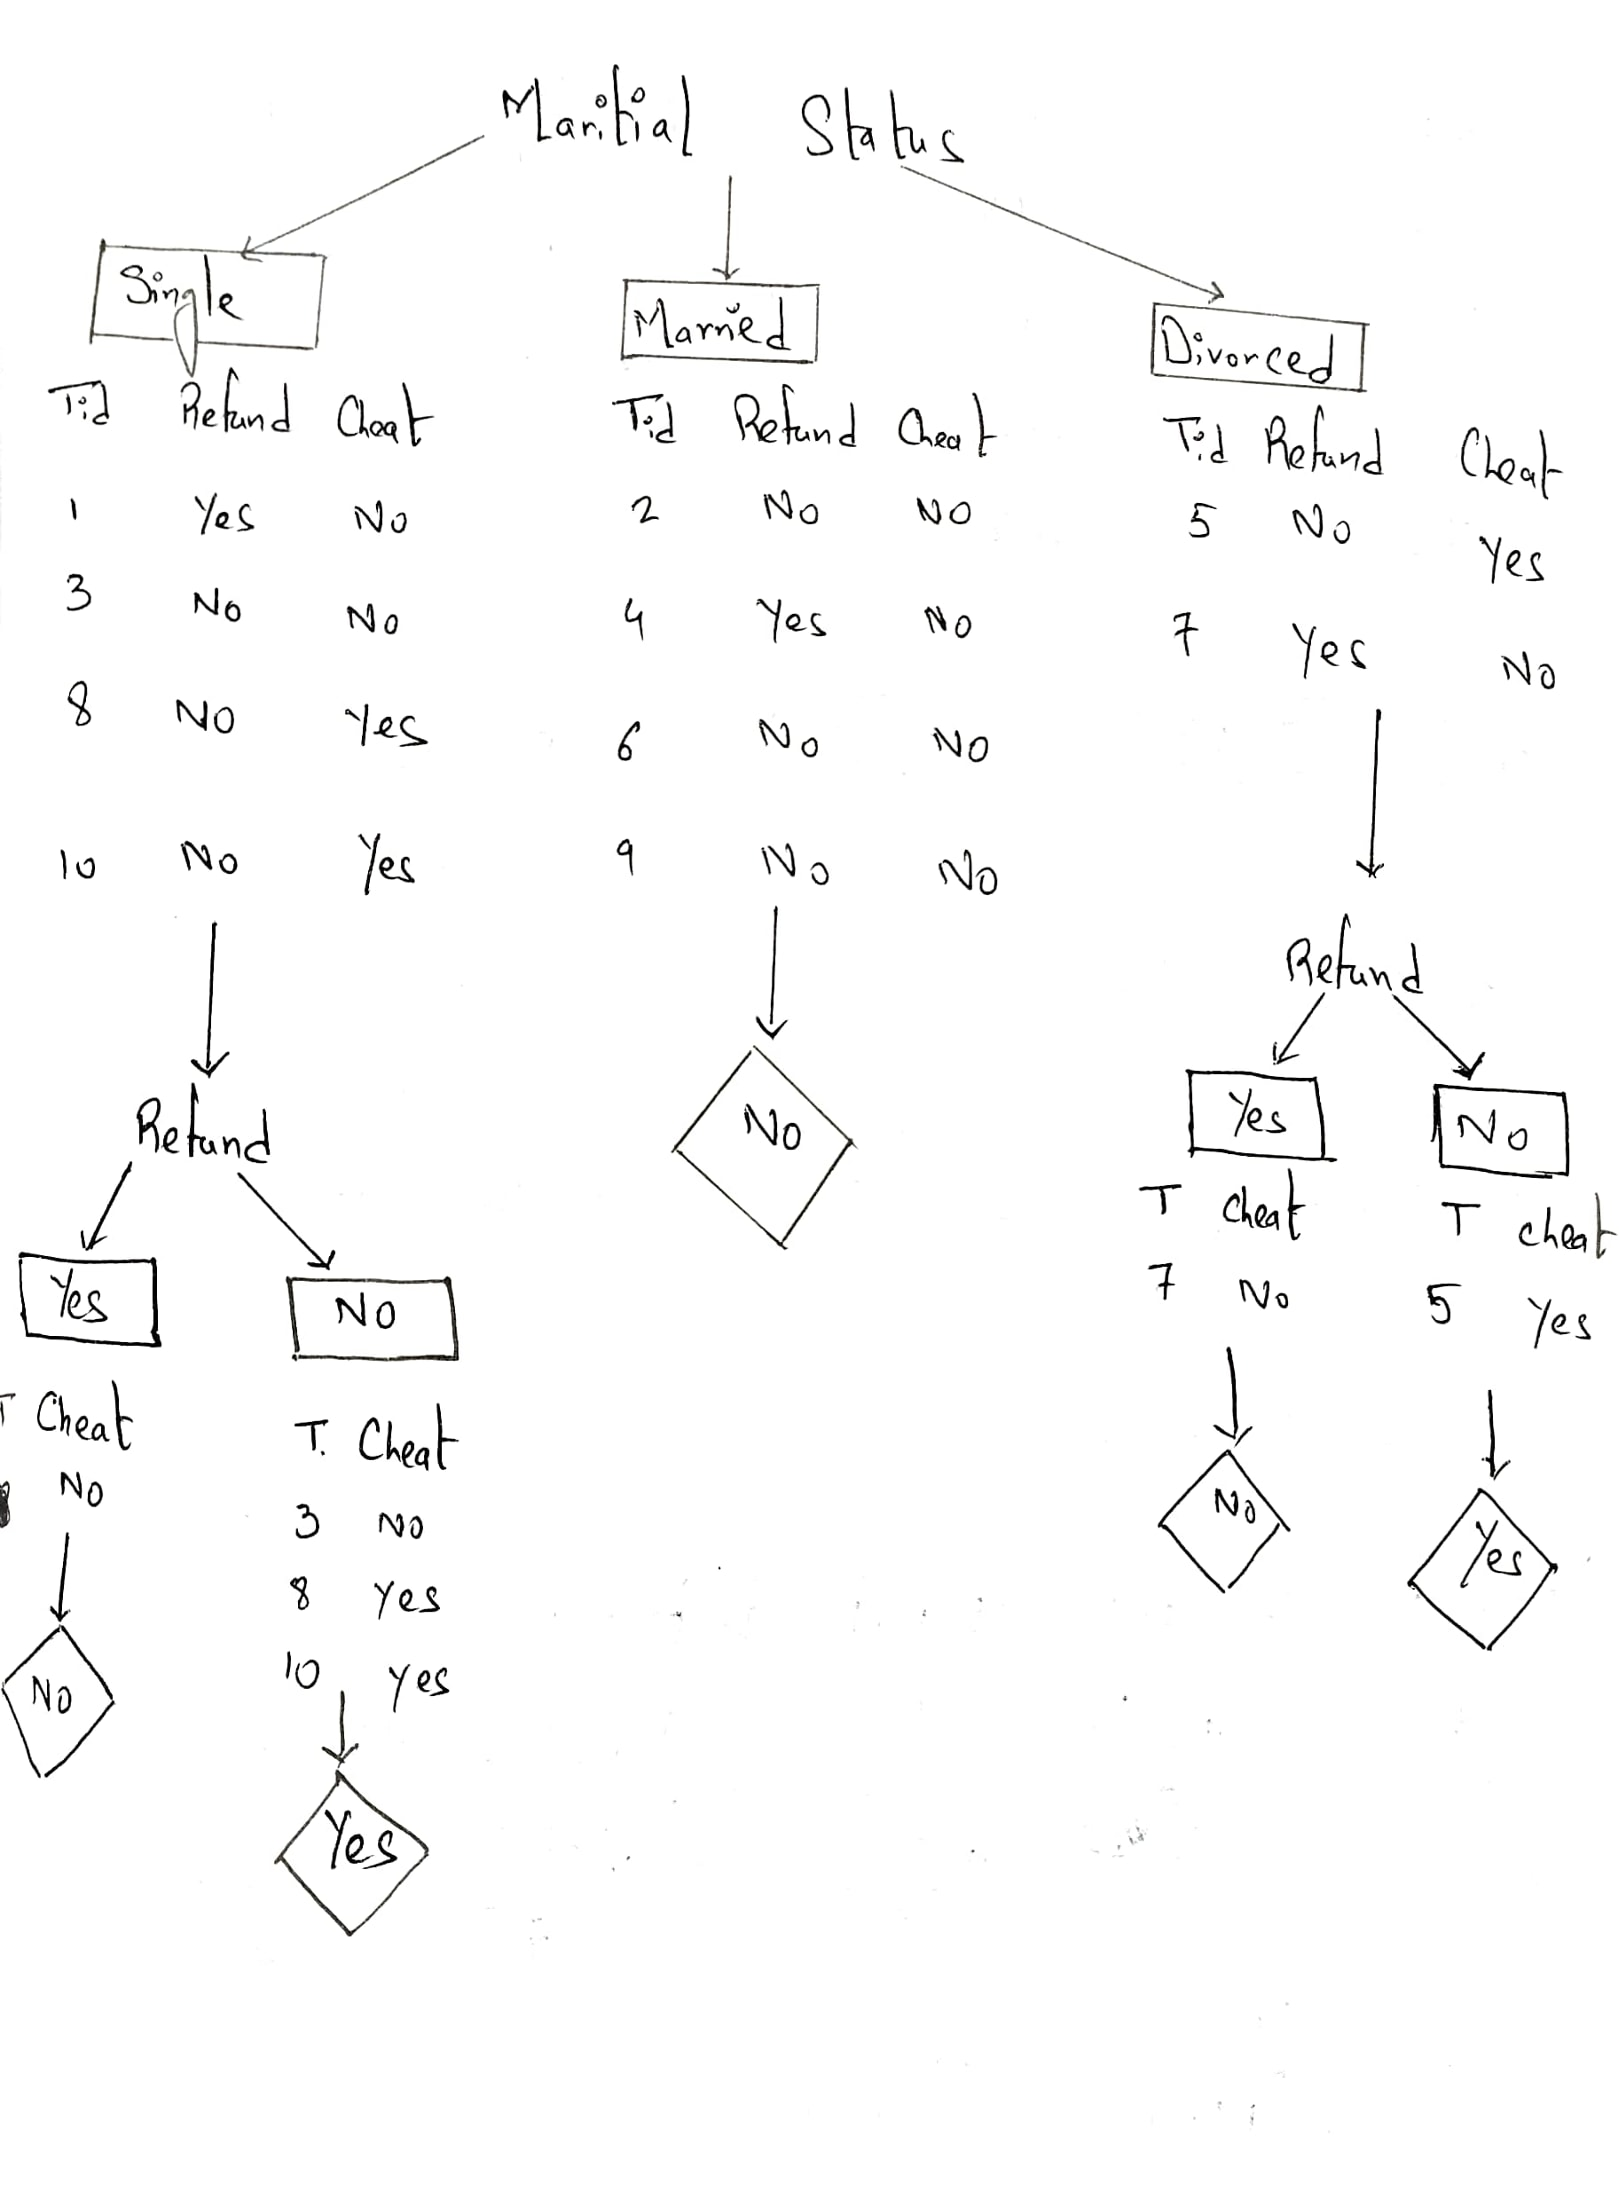

### Gini Impurity

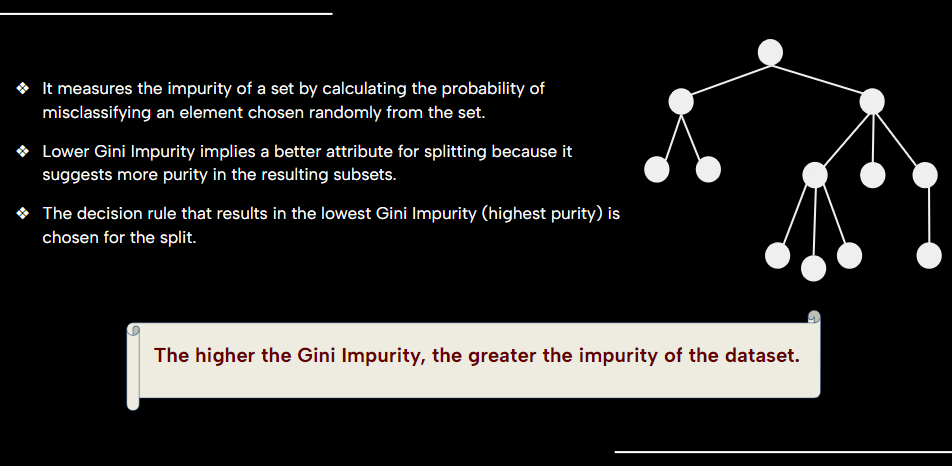

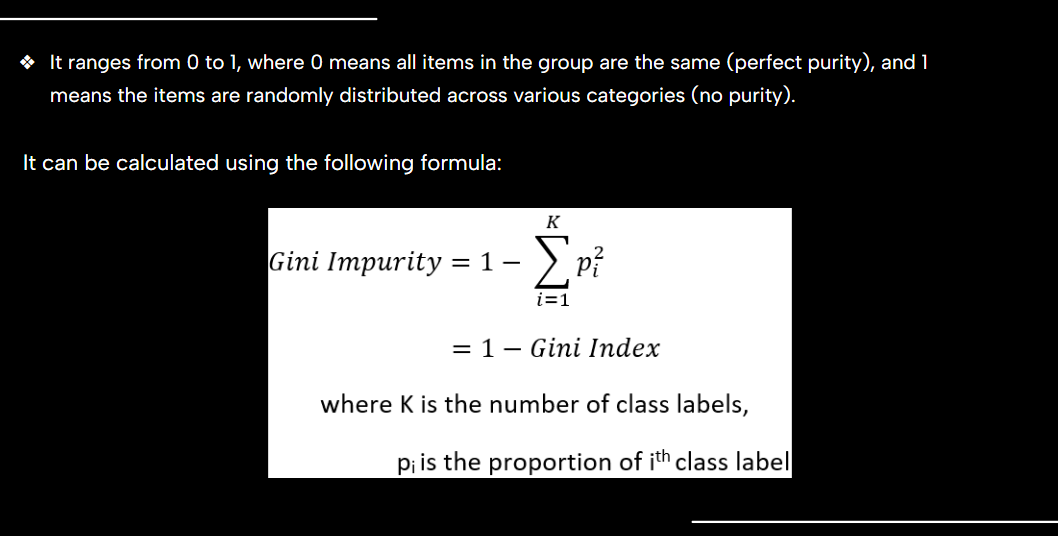

<br>

---
---

## Overfitting in Decision Trees

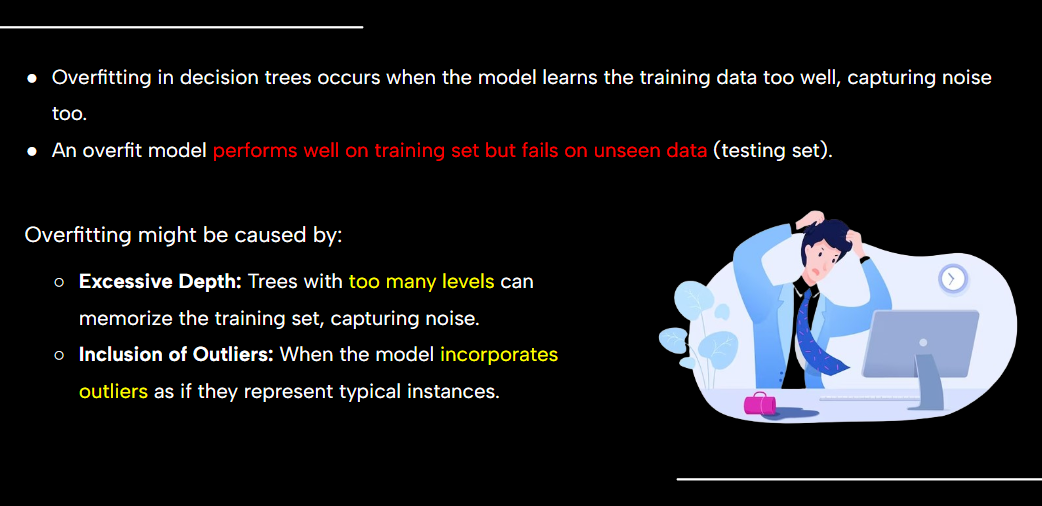

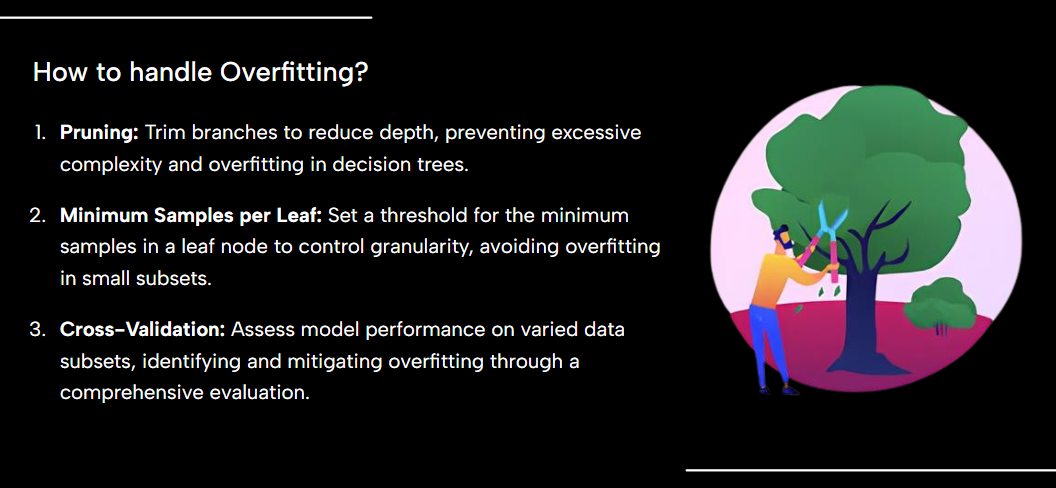

### Pruning

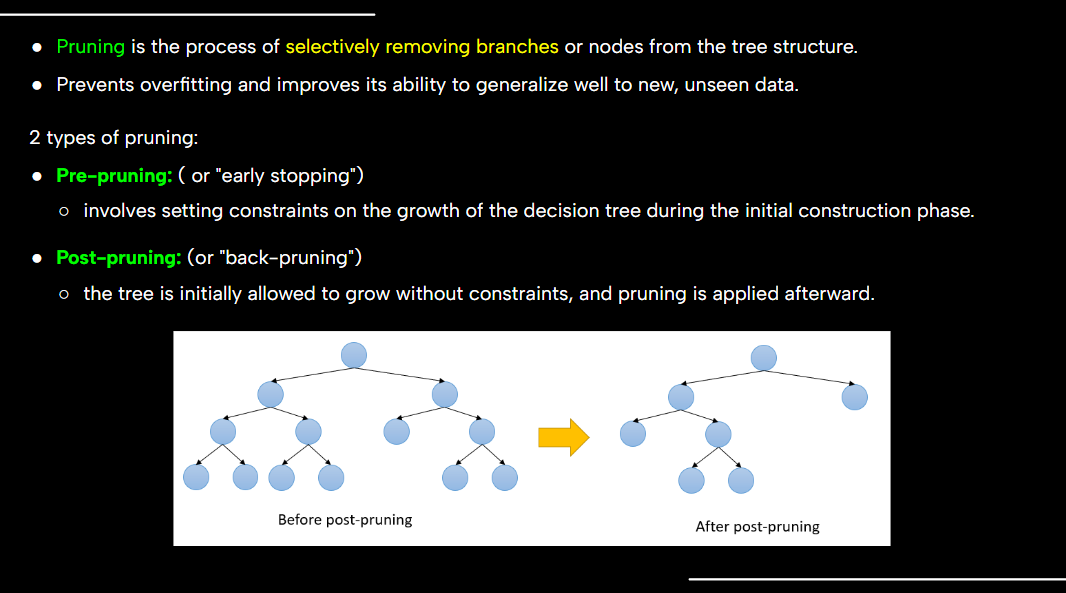

<br>

---
---

## Decision Tree implementation

Now that we're familiar with Decision trees, we'll create the model that we were tasked to build. We're supposed to create a model to predict heart disease based on patient data. For this, we'll use the [Heart Disease dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset).



Please download the dataset from the link above.

### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score

### Loading in the dataset

In [ ]:
!gdown 1qAI4-Y7_zQjuZ_f8UvAKnydWf5MndKu3

Downloading...
From: https://drive.google.com/uc?id=1qAI4-Y7_zQjuZ_f8UvAKnydWf5MndKu3
To: /content/heart.csv
100% 38.1k/38.1k [00:00<00:00, 53.9MB/s]


In [ ]:
df = pd.read_csv("/content/heart.csv")

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
y = df['target']
X = df.drop('target', axis=1)

### Splitting the dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
print('Train Set: ', X_train.shape, y_train.shape)
print('Test Set: ', X_test.shape, y_test.shape)

Train Set:  (717, 13) (717,)
Test Set:  (308, 13) (308,)


### Training the model

In [ ]:
model = DecisionTreeClassifier(criterion='gini', max_depth=5)

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
y_pred = model.predict(X_test)

### Checking accuracy of the model

In [ ]:
train_tree = metrics.accuracy_score(y_train, model.predict(X_train))
test_tree = metrics.accuracy_score(y_test, y_pred)
f1_tree = f1_score(y_test, y_pred, average='weighted')

print("Train set Accuracy: ", train_tree)
print("Test set Accuracy: ", test_tree)
print("Decision Tree's f1 Score: ", f1_tree)

Train set Accuracy:  0.9246861924686193
Test set Accuracy:  0.8603896103896104
Decision Tree's f1 Score:  0.8604175727922605


### Developing the Confusion matrix

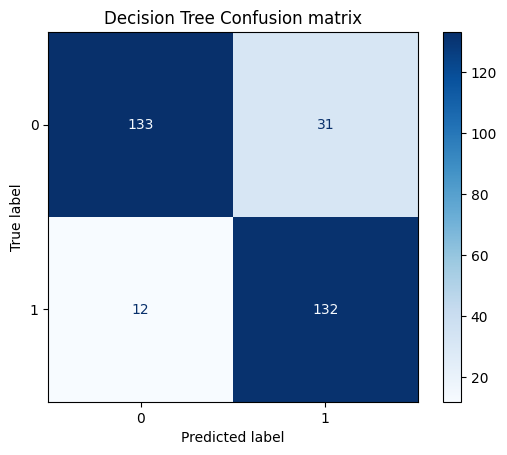

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title('Decision Tree Confusion matrix');

### Creating the Tree

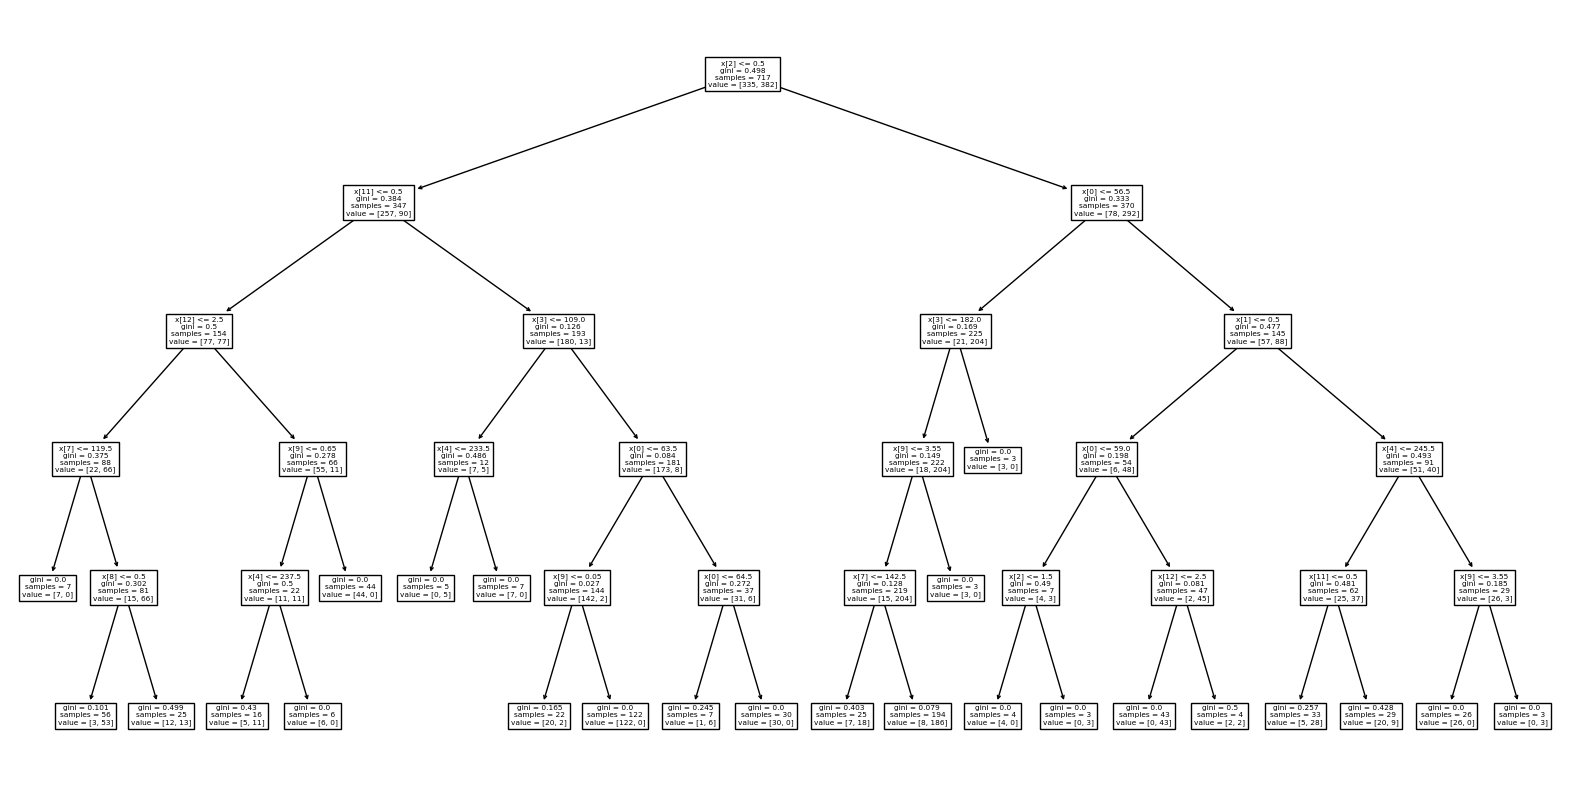

In [ ]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(20, 10))
tree.plot_tree(model.fit(X_train, y_train), ax=ax)
plt.show()